# K-means Clustering

### Import resources and display image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

BLUE = (0,0,255)
RED = (255,0,0)

### Read in an image

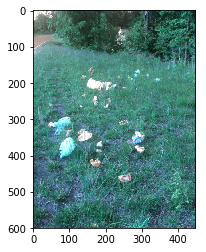

In [2]:
image = cv2.imread("images/trash1.png")
plt.imshow(image)

### Change from BGR to RGB

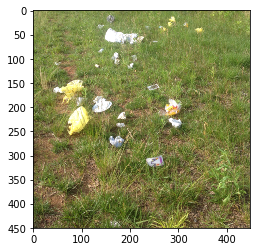

In [3]:
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image[150:,:]
plt.imshow(image)

### Reshape image to 2d array

In [4]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

### Implement K-means clustering 
##### K-means is an unsupervised learning algorithm using the Euclidean distance formula
$||x-y||=\sum_{i=1}^k{\sqrt{(x[i]-y[i])^2}}$

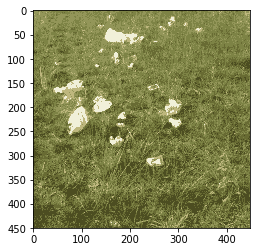

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

### Mask image by cluster

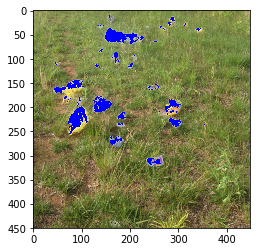

In [11]:
cluster = 4
masked_image = np.copy(image)
masked_image[labels_reshape == cluster] = [BLUE]

plt.imshow(masked_image)

In [12]:
print(masked_image.shape)

(450, 448, 3)


### Load new image

(372, 530, 3)


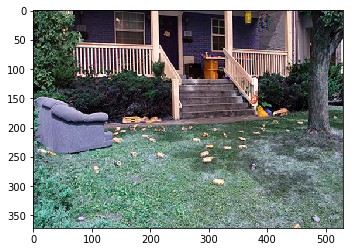

In [13]:
image2 = cv2.imread("images/trash3.jpg")

plt.imshow(image2)
print(image2.shape)

### Crop image and reshape

In [14]:
image2 = image2[200:,:]
pixel_vals = image2.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

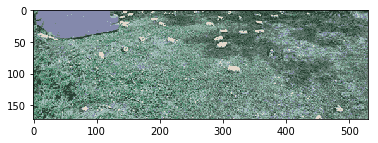

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 10
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((image2.shape))
labels_reshape = labels.reshape(image2.shape[0], image2.shape[1])

plt.imshow(segmented_image)

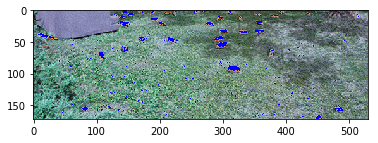

In [18]:
cluster = 4
masked_image = np.copy(image2)
masked_image[labels_reshape == cluster] = [BLUE]
cv2.imwrite('images/masked.jpg',masked_image)
plt.imshow(masked_image)

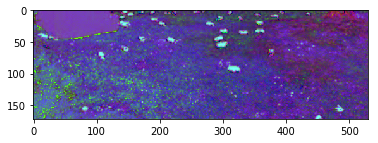

In [19]:
im = cv2.imread('images/masked.jpg')
hsv_img = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

## Find upper and lower color from BGR to HSV

In [20]:
#converts bgr to hsv and displays the equivalent of it
blue = np.uint8([[[255,0,0]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]


## Set color whichever you choose

In [21]:
lower_red = (0,255,255)
upper_red = (176,255,255) 

lower_yellow = (20, 80,80)
upper_yellow = (40,255,255)

lower_blue = (120,255,150)
upper_blue = (120,255,255)

## Draw bounding box around detected objects
### In this section the bounding box is put around the biggest color cluster.  This means either closer or larger in size.

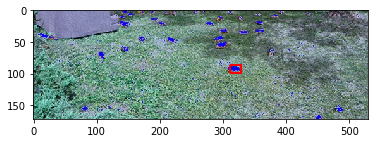

In [23]:
COLOR_MIN = np.array([lower_blue],np.uint8)
COLOR_MAX = np.array([upper_blue],np.uint8)
frame_threshed = cv2.inRange(hsv_img, COLOR_MIN, COLOR_MAX)
imgray = frame_threshed
ret,thresh = cv2.threshold(frame_threshed,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Find the index of the largest contour
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]

x,y,w,h = cv2.boundingRect(cnt)

pad_w = 4
pad_h = 5
pad_x = 3
pad_y = 4 

for i in cnt:
    cv2.rectangle(im,(x-pad_x,y-pad_y),(x+w+pad_w,y+h+pad_h),(255,0,0),2)

plt.imshow(im)


#### Notes: K-means is not the best for object detection mainly only used for data sorting operations.  It's extremely computationally expensive and inaccurate.  For best results use haars cascade or deep learning model. 